# Analysis

In [51]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
import sys
import math

In [53]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [54]:
sys.path.append("..")

In [55]:
from src.preprocess import VehicleState

In [56]:
mpl.rcParams["figure.facecolor"] = "w"

# Read data

In [57]:
df = pd.read_csv("../results/rdb1-fixed/situations.csv")

In [58]:
df["o2_state"] = df["o2_state"].map(VehicleState).astype("category")

In [59]:
df.head()

,path_id,o1_id,o2_id,t,distance,o2_state,o2_timedelta_drive_off,o2_velocity,measurement,roundabout
0,2,14,17,8.904500,2.62465,1,NaN,0.60,rdb1_1,rdb1
1,2,156,160,279.800000,2.53805,0,0.9705,0.00,rdb1_1,rdb1
2,2,256,260,425.211166,5.39825,1,NaN,2.83,rdb1_1,rdb1
3,3,9,3,2.333333,3.18875,1,NaN,0.22,rdb1_1,rdb1
4,3,3,4,4.233333,1.61635,0,0.1000,0.14,rdb1_1,rdb1


In [60]:
df.query("measurement == 'rdb1_1'").sample(20)

,path_id,o1_id,o2_id,t,distance,o2_state,o2_timedelta_drive_off,o2_velocity,measurement,roundabout
1,2,156,160,279.800000,2.53805,0,0.970500,0.00,rdb1_1,rdb1
0,2,14,17,8.904500,2.62465,1,NaN,0.60,rdb1_1,rdb1
22,13,206,207,355.595833,22.27880,1,NaN,4.60,rdb1_1,rdb1
41,25,344,345,552.911667,0.57660,1,NaN,0.28,rdb1_1,rdb1
33,13,247,248,420.194500,1.30300,0,1.903166,0.03,rdb1_1,rdb1
36,13,284,287,463.788833,15.91235,1,NaN,6.78,rdb1_1,rdb1
31,13,242,245,421.881666,8.02570,1,NaN,2.25,rdb1_1,rdb1
6,3,4,11,5.133333,5.49185,1,NaN,0.42,rdb1_1,rdb1
37,20,332,349,553.694833,60.56160,1,NaN,3.36,rdb1_1,rdb1
26,13,213,228,363.572333,31.92955,1,NaN,3.58,rdb1_1,rdb1


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3194 entries, 0 to 3193
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   path_id                 3194 non-null   int64   
 1   o1_id                   3194 non-null   int64   
 2   o2_id                   3194 non-null   int64   
 3   t                       3194 non-null   float64 
 4   distance                3194 non-null   float64 
 5   o2_state                3194 non-null   category
 6   o2_timedelta_drive_off  1799 non-null   float64 
 7   o2_velocity             3194 non-null   float64 
 8   measurement             3194 non-null   object  
 9   roundabout              3194 non-null   object  
dtypes: category(1), float64(4), int64(3), object(2)
memory usage: 227.9+ KB


In [62]:
df.describe()

,path_id,o1_id,o2_id,t,distance,o2_timedelta_drive_off,o2_velocity
count,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,1799.000000,3194.000000
mean,10.902317,13677.315905,13681.016907,262.793078,5.899389,2.485482,0.713945
std,7.547812,10758.948586,10758.602653,162.965281,10.453306,3.214761,1.356660
min,0.000000,3.000000,3.000000,0.066667,-105.635300,0.033333,0.000000
25%,3.000000,3860.250000,3865.750000,116.148542,2.051488,1.103666,0.020000
50%,13.000000,9821.000000,9824.000000,260.838583,3.223075,1.601834,0.100000
75%,13.000000,23683.750000,23695.500000,403.819750,7.766488,2.527084,0.740000
max,28.000000,32865.000000,32869.000000,560.883333,91.859850,36.169999,12.400000


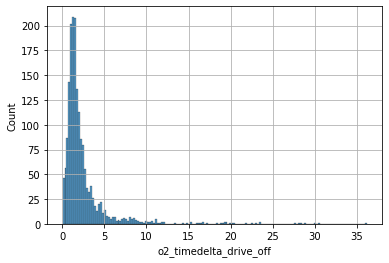

In [63]:
plt.figure()
sns.histplot(df["o2_timedelta_drive_off"])
plt.grid()

# Analyse

In [64]:
DISTANCE = 10

In [65]:
df_nearby = df[df["distance"] < DISTANCE]

Number of vehicles which are standing vs already moving

In [66]:
df_nearby["o2_state"].value_counts()

0    1612
1    1012
Name: o2_state, dtype: int64

In [67]:
proportion_o2_state = df_nearby["o2_state"].value_counts()/len(df_nearby)
proportion_o2_state.index = proportion_o2_state.index.map(lambda x: VehicleState(x).name)

Text(0.5, 1.0, 'Behaviour of the following vehicle')

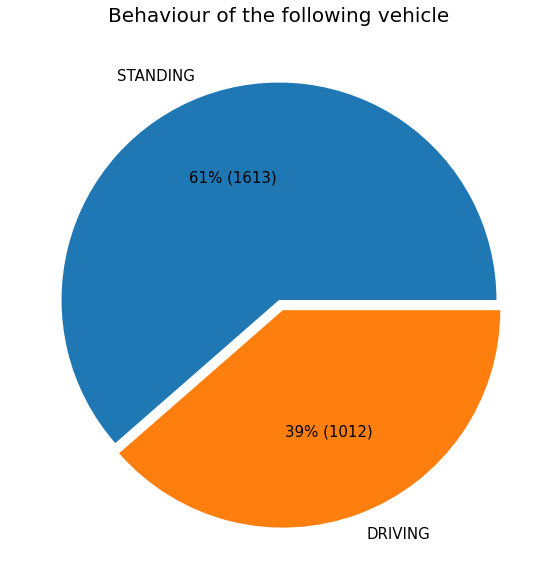

In [68]:
def render_label(pct: float) -> str:
    n = math.ceil(pct/100*len(df_nearby))
    return f"{pct:.0f}% ({n:d})"

plt.figure(figsize=(10, 10))
plt.pie(proportion_o2_state, labels=proportion_o2_state.index, autopct=render_label, explode=[0, 0.05], textprops={"fontsize": 15})
plt.title("Behaviour of the following vehicle", fontdict={"fontsize": 20})

## O2 is drivingVehicleState

In [69]:
df_nearby_and_moving = df_nearby[df_nearby["o2_state"] == VehicleState.DRIVING]

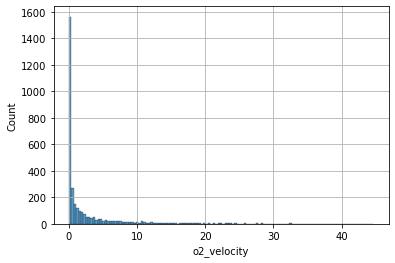

In [70]:
plt.figure()
sns.histplot(df["o2_velocity"]*3.6)
plt.grid()

## O2 is waiting

In [71]:
df_nearby_and_standing = df_nearby[df_nearby["o2_state"] == VehicleState.STANDING]

In [72]:
df_nearby_and_standing["o2_timedelta_drive_off"].describe()

count    1612.000000
mean        2.200054
std         2.962962
min         0.033333
25%         1.068959
50%         1.511584
75%         2.237541
max        36.169999
Name: o2_timedelta_drive_off, dtype: float64

Text(0.5, 0.98, 'Delay between leading and following vehicle.')

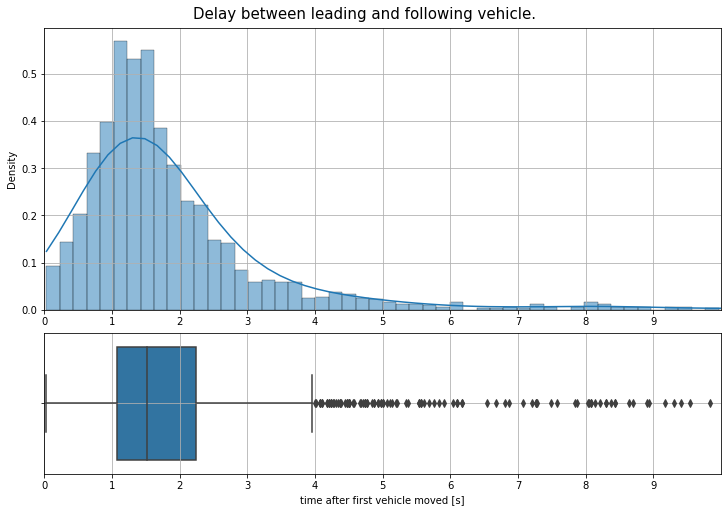

In [73]:
fig = plt.figure(constrained_layout=True, figsize=(10, 7))
gs = plt.GridSpec(3, 1, figure=fig)

ax1 = fig.add_subplot(gs[:2, 0])
ax2 = fig.add_subplot(gs[-1, 0])

sns.histplot(df_nearby_and_standing["o2_timedelta_drive_off"], ax=ax1, kde=True, stat="density")
sns.boxplot(x = df_nearby_and_standing["o2_timedelta_drive_off"], ax=ax2)
for ax in [ax1, ax2]:
    ax.set_xlim(0, 10)
    ax.grid()
    ax.set_xticks(np.arange(0, 10, 1))
    # ax.set_axis_off()

ax1.set_xlabel("")
ax2.set_xlabel("time after first vehicle moved [s]")
fig.suptitle("Delay between leading and following vehicle.", fontsize=15)

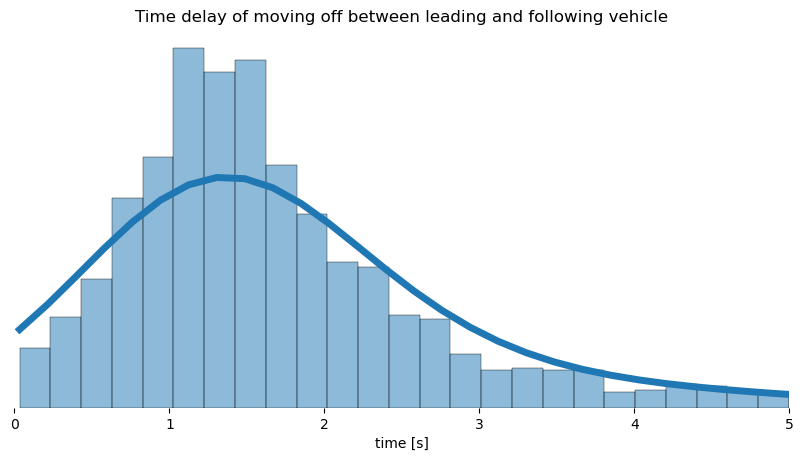

In [82]:
plt.figure(figsize=(10, 5), dpi=100)
sns.histplot(df_nearby_and_standing["o2_timedelta_drive_off"], kde=True, stat="density", line_kws={"lw": 5})
# plt.grid()
plt.xlabel("time [s]")
plt.title("Time delay of moving off between leading and following vehicle")
plt.xlim(0, 5)
plt.box(False)
plt.ylabel("")
plt.yticks([])
plt.xticks(np.arange(0, 5.1, 1));

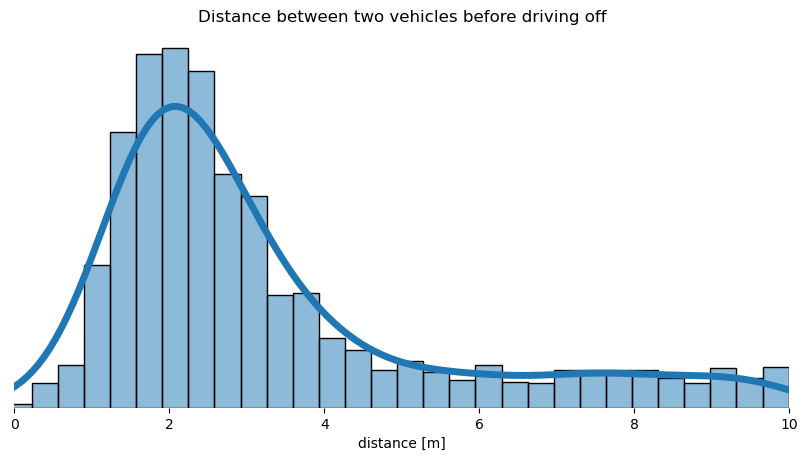

In [80]:
plt.figure(figsize=(10, 5), dpi=100)
sns.histplot(df_nearby_and_standing["distance"], kde=True, line_kws={"lw": 5})
# plt.grid()
plt.xlabel("distance [m]")
plt.ylabel("")
plt.title("Distance between two vehicles before driving off")
plt.xlim(0, 10)
plt.box(False)
plt.yticks([]);
# plt.tick_params(axis='y', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')